In [10]:
import os
os.getcwd()

import pandas as pd
import numpy as np
from scipy import stats 


In [ ]:
"blablablabl"

In [12]:
df_joined = pd.read_excel("../Downloads/updated_podatki.xlsx")

In [13]:
# Selecting columns you want to check for outliers
columns_to_check = ['percenterrors', 'meanRT','percenterrors_c', 'meanrt_c', 'percenterrors_ic', 'meanrt_ic']  # Replace with actual column names
# Calculate Z-score for the selected columns
z_scores = np.abs(stats.zscore(df_joined[columns_to_check]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to filter out rows with outliers in any of the selected columns
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out rows with outliers
df_cleaned = df_joined[~outlier_mask]
print(df_cleaned)

     IDkoda  SEX  AGE  Q2  Q3  Q4  Q5  Q9_2   Q6   Q8  ...  Snapchat actual  \
0   matt987    2   36   2   2   2   2   NaN  2.0  NaN  ...                0   
1   adef331    1   22   2   2   1   1   2.0  NaN  2.0  ...               15   
2   xdja222    1   23   1   2   2   1   2.0  NaN  2.0  ...               62   
4   135asdf    2   20   2   2   1   1   NaN  2.0  NaN  ...                0   
5   dobe123    1   25   1   2   1   1   NaN  2.0  NaN  ...                0   
..      ...  ...  ...  ..  ..  ..  ..   ...  ...  ...  ...              ...   
93  toto237    2   21   2   2   1   1   NaN  1.0  NaN  ...               16   
94  rike385    1   21   1   1   1   1   NaN  1.0  NaN  ...                3   
95  javs374    2   26   1   2   2   1   NaN  1.0  NaN  ...                0   
96  mark247    1   21   1   2   1   1   1.0  NaN  1.0  ...                9   
97  987ejej    2   21   2   2   2   2   2.0  NaN  1.0  ...               30   

    Threads actual  Pinterest actual  other actual 

In [14]:
columns_to_check_time = ['Perception of time on all social media','Instagram perception','TikTok perception', 'FB perception',
       'whatsApp perception', 'LinkedIn perception', 'Twitter perception',
       'Youtube perception', 'Snapchat perception', 'Threads perception',
       'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']

# Calculate Z-score for the selected columns
z_scores_time = np.abs(stats.zscore(df_cleaned[columns_to_check_time]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to filter out rows with outliers in any of the selected columns
outlier_mask_time = (z_scores_time > threshold).any(axis=1)

# Filter out rows with outliers
df_cleaned_time = df_cleaned[~outlier_mask_time]
df_cleaned_time = df_cleaned_time.reset_index(drop=True)

In [15]:
print(df_cleaned_time.columns)

Index(['IDkoda', 'SEX', 'AGE', 'Q2', 'Q3', 'Q4', 'Q5', 'Q9_2', 'Q6', 'Q8',
       'Q9', 'Q7a', 'Q7b', 'Perception of time on all social media',
       'Other social media', 'Instagram perception', 'TikTok perception',
       'FB perception', 'whatsApp perception', 'LinkedIn perception',
       'Twitter perception', 'Youtube perception', 'Snapchat perception',
       'Threads perception', 'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual', 'percenterrors', 'meanRT',
       'percenterrors_c', 'meanrt_c', 'percenterrors_ic', 'meanrt_ic'],
      dtype='object')


In [16]:
# Display the summary of the data
print(df_cleaned_time.describe())

             SEX        AGE         Q2         Q3         Q4         Q5  \
count  77.000000  77.000000  77.000000  77.000000  77.000000  77.000000   
mean    1.623377  22.649351   1.805195   1.870130   1.168831   1.285714   
std     0.538980   4.803415   0.398648   0.338365   0.377059   0.454716   
min     1.000000  20.000000   1.000000   1.000000   1.000000   1.000000   
25%     1.000000  21.000000   2.000000   2.000000   1.000000   1.000000   
50%     2.000000  22.000000   2.000000   2.000000   1.000000   1.000000   
75%     2.000000  23.000000   2.000000   2.000000   1.000000   2.000000   
max     3.000000  59.000000   2.000000   2.000000   2.000000   2.000000   

            Q9_2         Q6         Q8         Q9  ...  Snapchat actual  \
count  36.000000  41.000000  36.000000  41.000000  ...        77.000000   
mean    1.694444   1.292683   1.277778   1.780488  ...        25.363636   
std     0.467177   0.460646   0.454257   0.419058  ...        46.383955   
min     1.000000   1.000

In [17]:
# Calculate the average perceived and actual time spent on social media
perceived_cols = [col for col in df_cleaned_time.columns if "perception" in col]
actual_cols = [col for col in df_cleaned_time.columns if "actual" in col]


df_cleaned_time['difference'] = df_cleaned_time['Perception of time on all social media'] - df_cleaned_time['time spend on all social media apps actual']


In [19]:
print(df_cleaned_time['difference'].describe())

count     77.000000
mean    -263.636364
std      121.159194
min     -583.000000
25%     -326.000000
50%     -256.000000
75%     -185.000000
max       -4.000000
Name: difference, dtype: float64


In [20]:
# Analyze risk-taking behavior
lotteries_columns = df_cleaned_time.columns[3:13]
lotteries_data = df_cleaned_time[lotteries_columns]

# 2 represents safe option, 1 represents risky option
risk_taking_data = lotteries_data.apply(pd.to_numeric, errors='coerce')

# Binarize the risk-taking behavior for logistic regression (0 = safe, 1 = risky)- riksy has value 1
risk_taking_data_binary = risk_taking_data.applymap(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))
#beacuse in q6 and q9_2 the risky option is the option 1 (others is option 2)
risk_taking_data_binary['Q6']=risk_taking_data_binary['Q6'].apply(lambda x: 1 if x == 0 else (0 if x == 1 else np.nan))
risk_taking_data_binary['Q9_2']=risk_taking_data_binary['Q9_2'].apply(lambda x: 1 if x ==0 else (0 if x == 1 else np.nan))



/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/3488168606.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  risk_taking_data_binary = risk_taking_data.applymap(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:

# Define lottery pairs for gain and loss domains
lottery_pairs = {
    'Q9_2': 'Q6',
    'Q8': 'Q9',
    'Q7a': 'Q7b'
}

# Prepare data for t-tests and conduct the tests
t_test_results = {}
for loss_col, gain_col in lottery_pairs.items():
    loss_data = risk_taking_data_binary[loss_col].dropna()
    gain_data = risk_taking_data_binary[gain_col].dropna()
    
    t_stat, p_value = stats.ttest_ind(loss_data, gain_data)
    
    t_test_results[(loss_col, gain_col)] = (t_stat, p_value)

t_test_results


{('Q9_2', 'Q6'): (3.793360469954363, 0.00029886039852298075),
 ('Q8', 'Q9'): (5.049986187015259, 3.0107527558838038e-06),
 ('Q7a', 'Q7b'): (-5.072570263045555, 2.7564691806498778e-06)}

In [23]:
from scipy.stats import chi2_contingency
# Define the pairs and their respective domains
pairs = {
    ('Q9_2', 'Q6'): ('loss', 'gain'),
    ('Q8', 'Q9'): ('loss', 'gain'),
    ('Q7b', 'Q7a'): ('loss', 'gain')
}


results = {}
# Function to perform chi-squared test and return the result
def chi_squared_test(counts1, counts2):
    # Create contingency table
    contingency_table = pd.DataFrame([counts1, counts2], columns=['safe', 'risky'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Separate and aggregate responses for each pair
for (col1, col2), (domain1, domain2) in pairs.items():
    df_loss = risk_taking_data_binary[col1].dropna().value_counts().sort_index()
    df_gain = risk_taking_data_binary[col2].dropna().value_counts().sort_index()
    
    # Ensure both counts have safe and risky categories
    df_loss = df_loss.reindex([0, 1], fill_value=0)
    df_gain = df_gain.reindex([0, 1], fill_value=0)
    
    counts_loss = df_loss.values
    counts_gain = df_gain.values
    
    if counts_loss.sum() > 0 and counts_gain.sum() > 0:
        chi2, p, dof, expected = chi_squared_test(counts_loss, counts_gain)
        results[(col1, col2)] = {
            'chi2': chi2,
            'p-value': p,
            'degrees_of_freedom': dof,
            'expected_frequencies': expected
        }
    else:
        results[(col1, col2)] = 'Not enough data for chi-squared test'

# Print results
for pair, result in results.items():
    print(f"Pair: {pair}, Result: {result}")

Pair: ('Q9_2', 'Q6'), Result: {'chi2': 10.837915316230863, 'p-value': 0.00099442626638407, 'degrees_of_freedom': 1, 'expected_frequencies': array([[18.7012987, 17.2987013],
       [21.2987013, 19.7012987]])}
Pair: ('Q8', 'Q9'), Result: {'chi2': 17.563668699186998, 'p-value': 2.7784632549262468e-05, 'degrees_of_freedom': 1, 'expected_frequencies': array([[19.63636364, 16.36363636],
       [22.36363636, 18.63636364]])}
Pair: ('Q7b', 'Q7a'), Result: {'chi2': 17.693850824910275, 'p-value': 2.5946401470491066e-05, 'degrees_of_freedom': 1, 'expected_frequencies': array([[19.7012987, 21.2987013],
       [17.2987013, 18.7012987]])}


In [46]:
# Analyze social media usage

sm_columns = ['Perception of time on all social media',
       'Other social media', 'Instagram perception', 'TikTok perception',
       'FB perception', 'whatsApp perception', 'LinkedIn perception',
       'Twitter perception', 'Youtube perception', 'Snapchat perception',
       'Threads perception', 'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']
sm_data = df_cleaned_time[sm_columns]

sm_data['Perception of time on all social media']=sm_data['Perception of time on all social media']*60
sm_data['Perception of time on all social media']

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/2529344321.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['Perception of time on all social media']=sm_data['Perception of time on all social media']*60


0      60
1     360
2     240
3     240
4     240
     ... 
72    240
73    240
74    120
75    240
76    360
Name: Perception of time on all social media, Length: 77, dtype: int64

In [48]:
# Export the DataFrame to an Excel file
#sm_data.to_excel('sm_data.xlsx', index=False)

In [77]:
# Replace 0 values with NaN, so the values 0 are not taken into the account when calculating the means
sm_data.replace(0, np.nan, inplace=True)

# Calculate statistics ignoring NaN
statistics = sm_data.describe()

# Create new columns for the differences
sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']

social_media = ["Instagram", "TikTok", "FB", "whatsApp", "LinkedIn", "Twitter", "Youtube", "Snapchat", "Threads", "Pinterest", "other"]
for media in social_media:
    perception_col = f"{media} perception"
    actual_col = f"{media} actual"
    if perception_col in sm_data.columns and actual_col in sm_data.columns:
        difference_col = f"difference_{media}"
        sm_data[difference_col] = sm_data[perception_col] - sm_data[actual_col]

# Display the statistics
print("\nStatistics (ignoring NaN):")
print(statistics)
print((sm_data['Perception of time on all social media']).describe())
print((sm_data['time spend on all social media apps actual']).describe())


Statistics (ignoring NaN):
       Perception of time on all social media  Instagram perception  \
count                               77.000000             69.000000   
mean                               247.012987             80.304348   
std                                 88.660573             53.114556   
min                                 60.000000             15.000000   
25%                                180.000000             60.000000   
50%                                240.000000             60.000000   
75%                                300.000000            120.000000   
max                                420.000000            240.000000   

       TikTok perception  FB perception  whatsApp perception  \
count          44.000000      40.000000            17.000000   
mean          100.272727      28.275000            49.117647   
std            77.858955      24.507443            72.437803   
min             5.000000       2.000000             2.000000   
25%         

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/1152921165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data.replace(0, np.nan, inplace=True)
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/1152921165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/1152921165.py:16: SettingWithCopyWarning: 
A value is trying

In [85]:
#data2 = sm_data[['Perception of time on all social media','time spend on all social media apps actual']]
##statistics_table= data2.describe()

#excel_file = 'statistics_table.xlsx'
#statistics_table.to_excel(excel_file, index=True)

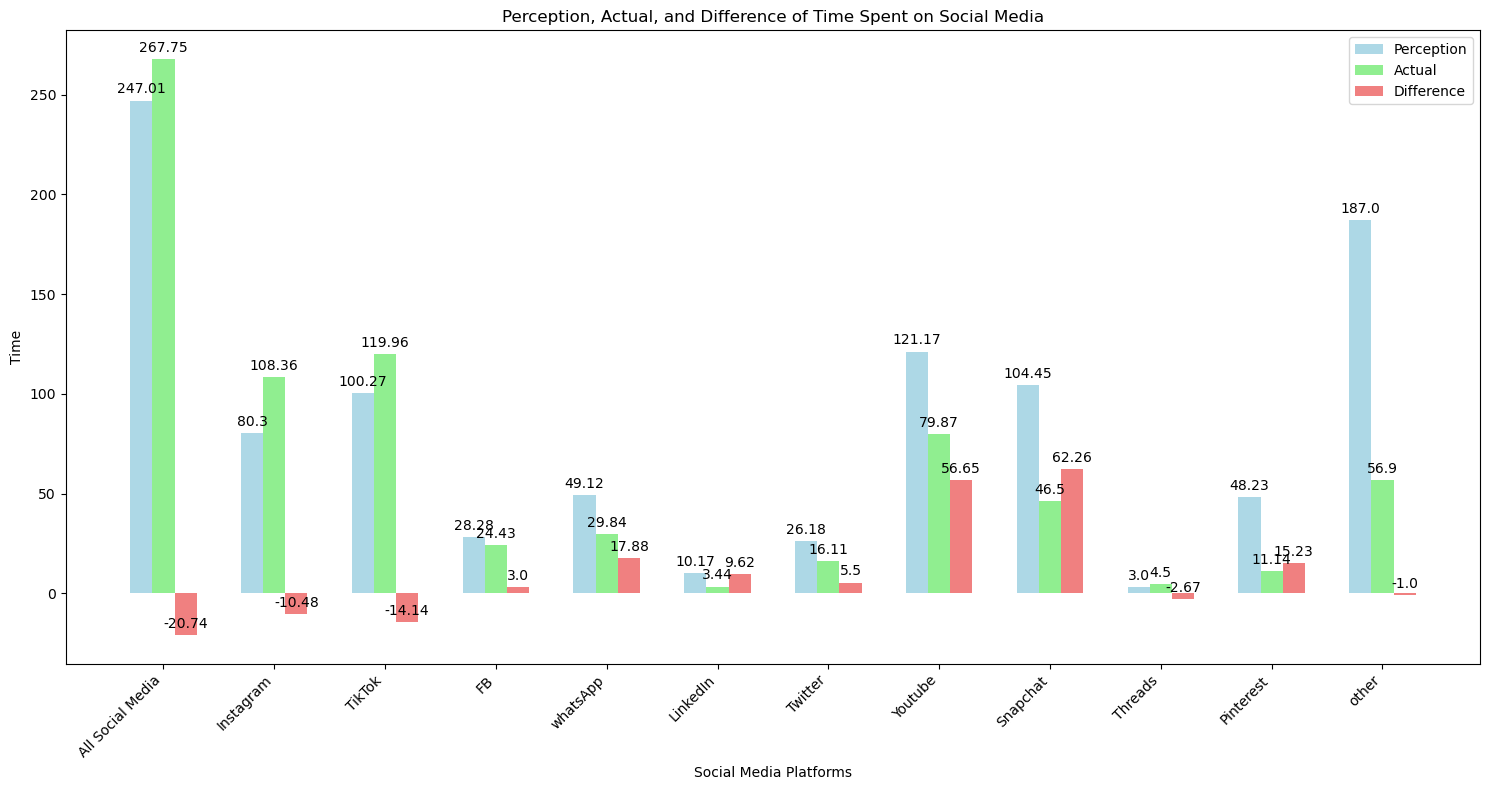

In [70]:
# Plotting
labels = ['All Social Media'] + social_media
perception_values = [sm_data['Perception of time on all social media'].mean()] + [sm_data[f"{media} perception"].mean() for media in social_media]
actual_values = [sm_data['time spend on all social media apps actual'].mean()] + [sm_data[f"{media} actual"].mean() for media in social_media]
difference_values = [sm_data['difference_all_social_media'].mean()] + [sm_data[f"difference_{media}"].mean() for media in social_media]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, perception_values, width, label='Perception', color='lightblue')
rects2 = ax.bar(x, actual_values, width, label='Actual', color='lightgreen')
rects3 = ax.bar(x + width, difference_values, width, label='Difference', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Time')
ax.set_title('Perception, Actual, and Difference of Time Spent on Social Media')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [65]:
correlation = sm_data[['Perception of time on all social media', 'time spend on all social media apps actual']].corr()
correlation

,Perception of time on all social media,time spend on all social media apps actual
Perception of time on all social media,1.000000,0.742657
time spend on all social media apps actual,0.742657,1.000000


In [100]:
# Flanker task analysis- first let's get data
F_columns = ['IDkoda','percenterrors', 'meanRT','percenterrors_c', 'meanrt_c', 'percenterrors_ic', 'meanrt_ic']
flanker = df_cleaned_time[F_columns]
#descriptive statistics 
print(flanker.dtypes)
print(flanker.describe())
#flanker.to_excel('Flanker.xlsx', index=True)

IDkoda               object
percenterrors       float64
meanRT              float64
percenterrors_c     float64
meanrt_c            float64
percenterrors_ic    float64
meanrt_ic           float64
dtype: object
       percenterrors      meanRT  percenterrors_c    meanrt_c  \
count      77.000000   77.000000        77.000000   77.000000   
mean        1.709957  539.630771         0.822511  512.437887   
std         3.010387   92.354336         2.304067   89.456926   
min         0.000000  386.762712         0.000000  365.793103   
25%         0.000000  476.416667         0.000000  458.033333   
50%         0.000000  535.016667         0.000000  501.833333   
75%         1.666667  567.627119         0.000000  551.200000   
max        18.333333  839.593220        13.333333  776.633333   

       percenterrors_ic   meanrt_ic  
count         77.000000   77.000000  
mean           2.597403  567.395701  
std            4.140210  100.580000  
min            0.000000  386.586207  
25%           

In [101]:
from scipy.stats import ttest_rel, pearsonr

# Paired t-tests
ttest_rt = ttest_rel(flanker['meanrt_c'], flanker['meanrt_ic'])
ttest_errors = ttest_rel(flanker['percenterrors_c'], flanker['percenterrors_ic'])

print("\nPaired t-test for Reaction Times:")
print(f"t-statistic: {ttest_rt.statistic}, p-value: {ttest_rt.pvalue}")

print("\nPaired t-test for Error Rates:")
print(f"t-statistic: {ttest_errors.statistic}, p-value: {ttest_errors.pvalue}")

# Correlation analysis
corr_rt = pearsonr(flanker['meanrt_c'], flanker['meanrt_ic'])
corr_errors = pearsonr(flanker['percenterrors_c'], flanker['percenterrors_ic'])

print("\nCorrelation Analysis for Reaction Times:")
print(f"Correlation coefficient: {corr_rt[0]}, p-value: {corr_rt[1]}")

print("\nCorrelation Analysis for Error Rates:")
print(f"Correlation coefficient: {corr_errors[0]}, p-value: {corr_errors[1]}")




Paired t-test for Reaction Times:
t-statistic: -10.443861806910439, p-value: 2.414829085257018e-16

Paired t-test for Error Rates:
t-statistic: -5.295400293358453, p-value: 1.1166664450387367e-06

Correlation Analysis for Reaction Times:
Correlation coefficient: 0.8883880379781657, p-value: 4.523136927015117e-27

Correlation Analysis for Error Rates:
Correlation coefficient: 0.7233034960337604, p-value: 1.0897944326919737e-13


In [105]:
import os
os.getcwd()

'/Users/brigitamilanic/Documents'

In [102]:
#calculation of cogntive inhibition index for accuarcy and reaction time

# Define the formulas for CII_ACC and CII_RT
def calculate_cii_acc(percenterrors_c, percenterrors_ic):
    acc_c = 100 - percenterrors_c
    acc_ic = 100 - percenterrors_ic
    return 1 - (acc_c - acc_ic) / ((acc_c + acc_ic) / 2)

def calculate_cii_rt(meanrt_c, meanrt_ic):
    return 1 - abs(meanrt_ic - meanrt_c) / ((meanrt_ic + meanrt_c) / 2)

# Apply the formulas to each row in the DataFrame
flanker['CII_ACC'] = flanker.apply(lambda row: calculate_cii_acc(row['percenterrors_c'], row['percenterrors_ic']), axis=1)
flanker['CII_RT'] = flanker.apply(lambda row: calculate_cii_rt(row['meanrt_c'], row['meanrt_ic']), axis=1)

# Save the results to a new CSV file
#output_file_path = '/mnt/data/cii_results.csv'
#flanker.to_csv(output_file_path, index=False)

# Display the first few rows of the updated DataFrame
print(flanker.head())


    IDkoda  percenterrors      meanRT  percenterrors_c    meanrt_c  \
0  matt987       0.000000  597.383333              0.0  572.033333   
1  adef331       0.000000  566.033333              0.0  543.000000   
2  135asdf       0.000000  427.533333              0.0  391.966667   
3  dobe123       1.666667  386.762712              0.0  386.933333   
4  kaln177       0.000000  561.766667              0.0  551.200000   

   percenterrors_ic   meanrt_ic   CII_ACC    CII_RT  
0          0.000000  622.733333  1.000000  0.915130  
1          0.000000  589.066667  1.000000  0.918615  
2          0.000000  463.100000  1.000000  0.833619  
3          3.333333  386.586207  0.966102  0.999102  
4          0.000000  572.333333  1.000000  0.962381  


/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/153528173.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flanker['CII_ACC'] = flanker.apply(lambda row: calculate_cii_acc(row['percenterrors_c'], row['percenterrors_ic']), axis=1)
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_58712/153528173.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flanker['CII_RT'] = flanker.apply(lambda row: calculate_cii_rt(row['meanrt_c'], row['meanrt_ic']), axis=1)
